# Chocolate Scraping with Beautiful Soup

After eating chocolate bars your whole life, you've decided to go on a quest to find the greatest chocolate bar in the world.

You've found a website that has over 1700 reviews of chocolate bars from all around the world. It's linked below the text for the first task.

The data is displayed in a table, instead of in a `csv` or `json`. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.

The rating scale is from 1-5, as described in <a href="http://flavorsofcacao.com/review_guide.html">this review guide</a>. A `1` is "unpleasant" chocolate, while a `5` is a bar that transcends "beyond the ordinary limits".

Some questions we thought about when we found this dataset were:
 - Where are the best cocao beans grown?
 - Which countries produce the highest-rated bars?
 - What's the relationship between cocao solids percentage and rating?
 
Can we find a way to answer these questions, or uncover more questions, using BeautifulSoup and Pandas?

## Make Some Chocolate Soup

1. Explore the webpage displayed in the browser. What elements could be useful to scrape here? Which elements do we _not_ want to scrape?

https://content.codecademy.com/courses/beautifulsoup/cacao/index.html

List of Tags to Include: table, tbody, tr, td

List of Tags to Exclude: html, head, h1, div, script

2. Let's make a request to this site to get the raw HTML, which we can later turn into a BeautifulSoup object.

   The URL is

```
https://content.codecademy.com/courses/beautifulsoup/cacao/index.html
```
   
   You can pass this into the `.get()` method of the `requests` module to get the HTML.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


html = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')
html_page = html.content

3. Create a BeautifulSoup object called `soup` to traverse this HTML.

   Use `"html.parser"` as the parser, and the content of the response you got from your request as the document.

In [3]:
soup = BeautifulSoup(html_page, 'html.parser')

4. If you want, print out the `soup` object to explore the HTML.

   So many table rows! You're probably very relieved that we don't have to scrape this information by hand.

In [4]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
<script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script></head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<

## How are ratings distributed?

5. How many terrible chocolate bars are out there? And how many earned a perfect 5? Let's make a histogram of this data.

   The first thing to do is to put all of the ratings into a list.
   
   Use a command on the `soup` object to get all of the tags that contain the ratings.

In [5]:
ratings_tags = soup.find_all(attrs={'class': 'Rating'})

6. Create an empty list called `ratings` to store all the ratings in.

In [6]:
ratings = [rating.get_text() for rating in ratings_tags[1:]]
ratings

['3.75',
 '2.75',
 '3',
 '3.5',
 '3.5',
 '2.75',
 '3.5',
 '3.5',
 '3.75',
 '4',
 '2.75',
 '3',
 '3.25',
 '3.75',
 '2.75',
 '3',
 '3.25',
 '4',
 '3.25',
 '3.5',
 '4',
 '3.5',
 '3.75',
 '3.75',
 '3.75',
 '2.75',
 '3.25',
 '3.5',
 '3.5',
 '2.75',
 '3',
 '3',
 '3.75',
 '2.75',
 '2.75',
 '2.75',
 '2.75',
 '3',
 '2.5',
 '2.5',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '2.75',
 '3',
 '2.5',
 '2.5',
 '2.75',
 '2.5',
 '3',
 '3.25',
 '3',
 '3.25',
 '4',
 '3.75',
 '4',
 '3',
 '3',
 '2.75',
 '3.5',
 '3',
 '3.75',
 '3',
 '2.75',
 '2.75',
 '3',
 '3.25',
 '3.5',
 '3',
 '3.25',
 '3.25',
 '3.25',
 '3.25',
 '3.5',
 '3.75',
 '4',
 '4',
 '5',
 '3',
 '3',
 '3.5',
 '3.75',
 '4',
 '3.5',
 '3.5',
 '5',
 '4',
 '3.25',
 '2.75',
 '3.75',
 '3.75',
 '4',
 '3',
 '3.5',
 '3',
 '2.5',
 '2.75',
 '3',
 '3.5',
 '3.75',
 '3.5',
 '3.25',
 '3.25',
 '3.5',
 '3.75',
 '3.5',
 '4',
 '4',
 '3.75',
 '3.25',
 '3.25',
 '3.5',
 '3.5',
 '3.75',
 '3.5',
 '3.75',
 '4',
 '2.75',
 '3.25',
 '3.5',
 '3.25',
 '3.75',
 '4',
 '2.75',
 '1.75',
 '3.75'

7. Loop through the ratings tags and get the text contained in each one. Add it to the ratings list.

   As you do this, convert the rating to a float, so that the ratings list will be numerical. This should help with calculations later.

In [7]:
ratings = [float(rating) for rating in ratings]

8. Using Matplotlib, create a histogram of the ratings values:

```py
plt.hist(ratings)
```

   Remember to show the plot using `plt.show()`!

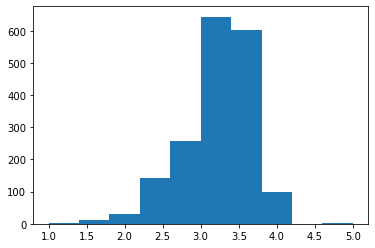

In [8]:
plt.hist(ratings)
plt.show()

## Which chocolatier makes the best chocolate?

9. We want to now find the 10 most highly rated chocolatiers. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a `groupby` to find the ones with the highest average rating.

   First, let's find all tags on the webpage that contain the company names.

In [9]:
company_tags = soup.select('.Company')
# company_names

10. Just like we did with ratings, we now want to make an empty list to hold company names.

In [10]:
companies = []

11. Loop through the tags containing the company names, and add the text from each tag to the list you just created.

In [11]:
companies = [company.get_text() for company in company_tags[1:]]
companies

['A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'Acalli',
 'Acalli',
 'Adi',
 'Adi',
 'Adi',
 'Adi',
 'Aequare (Gianduja)',
 'Aequare (Gianduja)',
 'Ah Cacao',
 "Akesson's (Pralus)",
 "Akesson's (Pralus)",
 "Akesson's (Pralus)",
 'Alain Ducasse',
 'Alain Ducasse',
 'Alain Ducasse',
 'Alain Ducasse',
 'Alain Ducasse',
 'Alexandre',
 'Alexandre',
 'Alexandre',
 'Alexandre',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amatller (Simon Coll)

12. Create a DataFrame with a column "Company" corresponding to your companies list, and a column "Ratings" corresponding to your ratings list.

In [12]:
chocolate_df = pd.DataFrame({'Company': companies, 'Ratings': ratings})
chocolate_df

,Company,Ratings
0,A. Morin,3.75
1,A. Morin,2.75
2,A. Morin,3.00
3,A. Morin,3.50
4,A. Morin,3.50
...,...,...
1790,Zotter,3.75
1791,Zotter,3.00
1792,Zotter,3.50
1793,Zotter,3.25


13. Use `.grouby` to group your DataFrame by Company and take the average of the grouped ratings.

    Then, use the `.nlargest` command to get the 10 highest rated chocolate companies. Print them out.
    
    Look at the hint if you get stuck on this step!

In [188]:
average_ratings = chocolate_df.groupby('Company').Ratings.mean()
top_ten = average_ratings.nlargest(10).reset_index()
top_ten

,Company,Ratings
0,Tobago Estate (Pralus),4.000000
1,Heirloom Cacao Preservation (Zokoko),3.875000
2,Ocelot,3.875000
3,Amedei,3.846154
4,Matale,3.812500
5,Patric,3.791667
6,Idilio (Felchlin),3.775000
7,Acalli,3.750000
8,Chocola'te,3.750000
9,Christopher Morel (Felchlin),3.750000


## Is more cacao better?

14. We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.

    It looks like the cocoa percentages are in the table under the Cocoa Percent column (note we are looking at cocoa not cocao!)
    
    Using the same methods you used in the last couple of tasks, create a list that contains all of the cocoa percentages. Store each percent as a float, after stripping off the `%` character.

In [189]:
percent_tags = soup.find_all(attrs={'class': 'CocoaPercent'})
cocoa_percentage = [float(percent.get_text().split('%')[0]) for percent in percent_tags[1:]]
cocoa_percentage
# percent_tags

[63.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 63.0,
 70.0,
 63.0,
 70.0,
 70.0,
 60.0,
 80.0,
 88.0,
 72.0,
 55.0,
 70.0,
 70.0,
 75.0,
 75.0,
 75.0,
 65.0,
 75.0,
 75.0,
 75.0,
 75.0,
 70.0,
 70.0,
 70.0,
 70.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 60.0,
 80.0,
 60.0,
 60.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 85.0,
 85.0,
 72.0,
 73.0,
 64.0,
 66.0,
 75.0,
 63.0,
 70.0,
 68.0,
 70.0,
 70.0,
 75.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 63.0,
 70.0,
 66.0,
 75.0,
 85.0,
 50.0,
 75.0,
 60.0,
 75.0,
 75.0,
 75.0,
 72.0,
 75.0,
 75.0,
 70.0,
 70.0,
 73.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 73.0,
 70.0,
 68.0,
 70.0,
 70.0,
 70.0,
 70.0,
 75.0,
 70.0,
 75.0,
 72.0,
 72.0,
 72.0,
 72.0,
 100.0,
 72.0,
 72.0,
 72.0,
 72.0,
 75.0,
 72.0,
 72.0,
 80.0,
 75.0,
 72.0,
 72.0,
 72.0,
 68.0,
 72.0,
 70.0,
 77.0,
 75.0

15. Add the cocoa percentages as a column called `"CocoaPercentage"` in the DataFrame that has companies and ratings in it.

In [15]:
chocolate_df['CocoaPercentage'] = cocoa_percentage
chocolate_df.reset_index()
chocolate_df

,Company,Ratings,CocoaPercentage
0,A. Morin,3.75,63.0
1,A. Morin,2.75,70.0
2,A. Morin,3.00,70.0
3,A. Morin,3.50,70.0
4,A. Morin,3.50,70.0
...,...,...,...
1790,Zotter,3.75,70.0
1791,Zotter,3.00,65.0
1792,Zotter,3.50,65.0
1793,Zotter,3.25,62.0


16. Make a scatterplot of ratings (`your_df.Rating`) vs percentage of cocoa (`your_df.CocoaPercentage`).

    You can do this in Matplotlib with these commands:
    
```py
plt.scatter(df.CocoaPercentage, df.Rating)
plt.show()
```

Call `plt.clf()` to clear the figure between showing your histogram and this scatterplot.

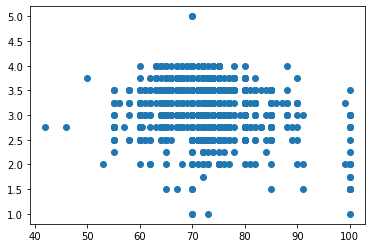

In [16]:
plt.clf()
plt.scatter(chocolate_df.CocoaPercentage, chocolate_df.Ratings)
plt.show()

In [17]:
plt.clf

<function matplotlib.pyplot.clf()>

17. Is there any correlation here? We can use some numpy commands to draw a line of best-fit over the scatterplot.

    Copy this code and paste it after you create the scatterplot, but before you call `.show()`:
    
```py
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r-")
```

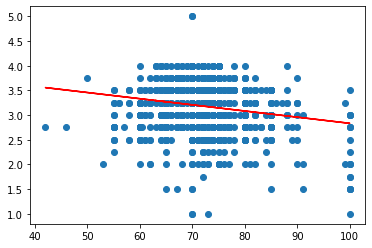

In [18]:
plt.scatter(chocolate_df.CocoaPercentage, chocolate_df.Ratings)
z = np.polyfit(chocolate_df.CocoaPercentage, chocolate_df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(chocolate_df.CocoaPercentage, line_function(chocolate_df.CocoaPercentage), "r-")
plt.show()

## Explore!

18. We have explored a couple of the questions about chocolate that inspired us when we looked at this chocolate table.

    What other kinds of questions can you answer here? Try to use a combination of BeautifulSoup and Pandas to explore some more.
    
    For inspiration: Where are the best cocoa beans grown? Which countries produce the highest-rated bars?

In [19]:
bean_tags = soup.find_all(attrs={'class': 'BeanType'})
# bean_tags
bean_types = [bean_tag.get_text() for bean_tag in bean_tags[1:]]
# bean_types
chocolate_df['BeanType'] = bean_types
chocolate_df['BeanType'].replace(['\xa0', ''], 'NA', inplace=True)
chocolate_df

,Company,Ratings,CocoaPercentage,BeanType
0,A. Morin,3.75,63.0,NA
1,A. Morin,2.75,70.0,NA
2,A. Morin,3.00,70.0,NA
3,A. Morin,3.50,70.0,NA
4,A. Morin,3.50,70.0,NA
...,...,...,...,...
1790,Zotter,3.75,70.0,NA
1791,Zotter,3.00,65.0,Forastero
1792,Zotter,3.50,65.0,Forastero
1793,Zotter,3.25,62.0,NA


In [21]:
avg_bean_rating = chocolate_df.groupby('BeanType').Ratings.mean().reset_index()
avg_bean_rating

,BeanType,Ratings
0,Amazon,3.250000
1,Amazon mix,3.750000
2,"Amazon, ICS",3.625000
3,Beniano,3.583333
4,Blend,3.353659
5,"Blend-Forastero,Criollo",3.750000
6,CCN51,3.500000
7,Criollo,3.240196
8,Criollo (Amarru),3.250000
9,Criollo (Ocumare 61),3.250000


/tmp/ipykernel_106164/4014250186.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(avg_bean_rating['BeanType'], rotation=90)


<Figure size 432x288 with 0 Axes>

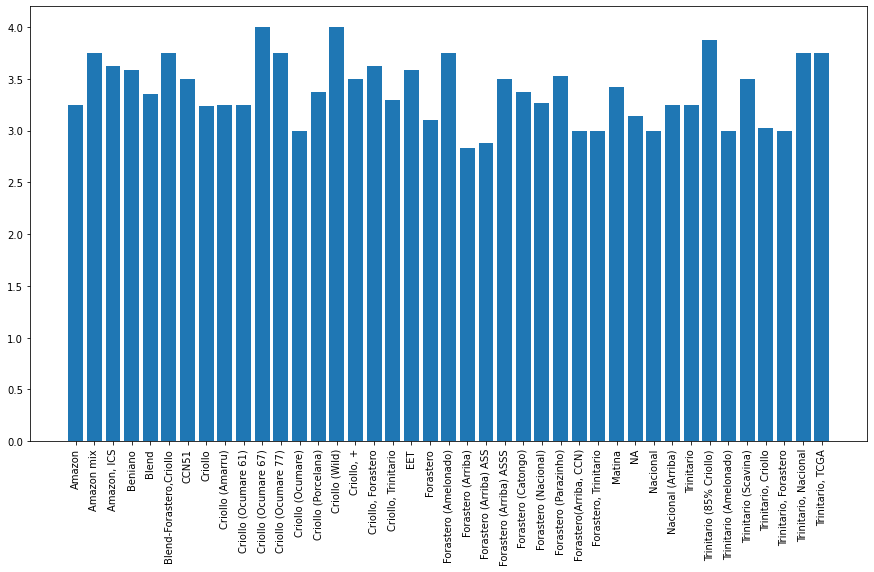

In [22]:
plt.clf()
plt.figure(figsize=(15, 8))
ax = plt.subplot()
plt.bar(avg_bean_rating['BeanType'], avg_bean_rating['Ratings'])
ax.set_xticklabels(avg_bean_rating['BeanType'], rotation=90)
plt.show()


In [23]:
avg_bean_rating_sorted = avg_bean_rating.sort_values(by='Ratings', ascending=False)
avg_bean_rating_sorted

,BeanType,Ratings
10,Criollo (Ocumare 67),4.000000
14,Criollo (Wild),4.000000
34,Trinitario (85% Criollo),3.875000
20,Forastero (Amelonado),3.750000
39,"Trinitario, Nacional",3.750000
1,Amazon mix,3.750000
11,Criollo (Ocumare 77),3.750000
40,"Trinitario, TCGA",3.750000
5,"Blend-Forastero,Criollo",3.750000
16,"Criollo, Forastero",3.625000


/tmp/ipykernel_106164/2292029376.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(avg_bean_rating['BeanType'], rotation=90)


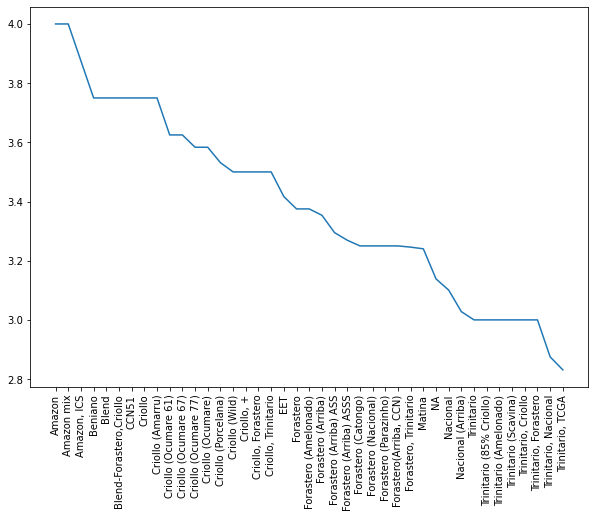

In [24]:
plt.figure(figsize=(10, 7))
ax = plt.subplot()
ax.set_xticklabels(avg_bean_rating['BeanType'], rotation=90)
plt.plot(avg_bean_rating_sorted['BeanType'], avg_bean_rating_sorted['Ratings'])

In [32]:
bean_origin_tags = soup.find_all(attrs={'class': 'Origin'});
bean_origin = [tag.get_text() for tag in bean_origin_tags[1:]]
chocolate_df['BeanOrigin'] = bean_origin
chocolate_df

,Company,Ratings,CocoaPercentage,BeanType,BeanOrigin
0,A. Morin,3.75,63.0,NA,Agua Grande
1,A. Morin,2.75,70.0,NA,Kpime
2,A. Morin,3.00,70.0,NA,Atsane
3,A. Morin,3.50,70.0,NA,Akata
4,A. Morin,3.50,70.0,NA,Quilla
...,...,...,...,...,...
1790,Zotter,3.75,70.0,NA,Peru
1791,Zotter,3.00,65.0,Forastero,Congo
1792,Zotter,3.50,65.0,Forastero,Kerala State
1793,Zotter,3.25,62.0,NA,Kerala State


In [190]:
bean_origin_df = pd.DataFrame({'BeanOrigin': bean_origin, 'Rating': ratings})
bean_origin_mean = bean_origin_df.groupby('BeanOrigin').mean().reset_index()
bean_origin_count = bean_origin_df.groupby('BeanOrigin').count().reset_index()
bean_origin_mean.sort_values(by='Rating', ascending=False)

# bean_origin_count[bean_origin_count['BeanOrigin'] == 'Ghana']
# 

,BeanOrigin,Rating
962,Toscano Black,4.166667
798,"Porcelana, Zulia",4.000000
65,Asante,4.000000
870,San Juan de Cheni,4.000000
707,"Ocumare, Puerto Cabello, Venezuela",4.000000
...,...,...
530,Le Noir Extra Amer,1.500000
768,Pichincha,1.500000
716,One Hundred,1.500000
889,Sensations Intense,1.000000


In [54]:
bb_origin_tags = soup.find_all(attrs={'class': 'BroadBeanOrigin'});
bb_origin = [tag.get_text() for tag in bb_origin_tags[1:]]
chocolate_df['BroadBeanOrigin'] = bb_origin
chocolate_df

,Company,Ratings,CocoaPercentage,BeanType,BeanOrigin,BroadBeanOrigin
0,A. Morin,3.75,63.0,NA,Agua Grande,Sao Tome
1,A. Morin,2.75,70.0,NA,Kpime,Togo
2,A. Morin,3.00,70.0,NA,Atsane,Togo
3,A. Morin,3.50,70.0,NA,Akata,Togo
4,A. Morin,3.50,70.0,NA,Quilla,Peru
...,...,...,...,...,...,...
1790,Zotter,3.75,70.0,NA,Peru,Peru
1791,Zotter,3.00,65.0,Forastero,Congo,Congo
1792,Zotter,3.50,65.0,Forastero,Kerala State,India
1793,Zotter,3.25,62.0,NA,Kerala State,India


In [70]:
bb_origin_df = pd.DataFrame({'BroadBeanOrigin': bb_origin, 'Rating': ratings})
bb_origin_mean = bb_origin_df.groupby('BroadBeanOrigin').mean().reset_index()
bb_origin_count = bb_origin_df.groupby('BroadBeanOrigin').count().reset_index()
bb_origin_count.sort_values(by='Rating', ascending=False)
# bb_origin_mean.sort_values(by='Rating', ascending=False)

bb_origin_count[bb_origin_count['BroadBeanOrigin'] == 'Ghana']

,BroadBeanOrigin,Rating
28,Ghana,33


# EXTRA EXTRA

Created a pandas dataframe of the whole table at once using loops and other syntax.

In [191]:
dictt = {'Company': [], 'BeanOrigin': [], 'REF': [], 'ReviewDate': [], 
        'CocoaPercent': [], 'CompanyLocation': [], 'Rating': [], 
        'BeanType': [], 'BroadBean': []}

tr = soup.find_all('tr')
tr = tr[3:]
tr
for tag in tr:
    con = tag.contents
    dictt['Company'].append(con[1].text)
    dictt['BeanOrigin'].append(con[3].text)
    dictt['REF'].append(con[5].text)
    dictt['ReviewDate'].append(con[7].text)
    dictt['CocoaPercent'].append(con[9].text)
    dictt['CompanyLocation'].append(con[11].text)
    dictt['Rating'].append(con[13].text)
    dictt['BeanType'].append(con[15].text)
    dictt['BroadBean'].append(con[17].text)

    
# dictt['ReviewDate']

In [192]:
cocoa_df = pd.DataFrame(dictt)
cocoa_df

,Company,BeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBean
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.5,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.5,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.5,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India
